In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import os

In [2]:
data_files = os.listdir('data/csv/')

In [3]:
df_list = []
for file in data_files:
    df_list.append(pd.read_csv('data/csv/'+file))
data = pd.concat(df_list).reset_index().drop(columns=['Unnamed: 76', 'Unnamed: 75'])

In [4]:
list(data.columns)

['level_0',
 'index',
 'stimulus',
 'correct_answer',
 'block.thisRepN',
 'block.thisTrialN',
 'block.thisN',
 'block.thisIndex',
 'trial.thisRepN',
 'trial.thisTrialN',
 'trial.thisN',
 'trial.thisIndex',
 'display_row.thisRepN',
 'display_row.thisTrialN',
 'display_row.thisN',
 'display_row.thisIndex',
 'pair_questions.thisRepN',
 'pair_questions.thisTrialN',
 'pair_questions.thisN',
 'pair_questions.thisIndex',
 'welcome_text.started',
 'instructions_0_keypress.started',
 'instructions_0_keypress.keys',
 'instructions_0_keypress.rt',
 'instructions_1_keypress.started',
 'instructions_1_text.started',
 'instructions_1_keypress.keys',
 'instructions_1_keypress.rt',
 'instructions_2_keypress.started',
 'instructions_2_text.started',
 'instructions_2_keypress.keys',
 'instructions_2_keypress.rt',
 'text_countdown.started',
 'text_countdown.stopped',
 'image.started',
 'size_question.started',
 'size_resp.started',
 'keypress_options.started',
 'size_resp.keys',
 'size_resp.corr',
 'size

In [10]:
data_size = data.dropna(subset=['size_resp.corr']).drop(columns=['level_0']).reset_index()

In [6]:
data_size['block.thisN']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
34995    9.0
34996    9.0
34997    9.0
34998    9.0
34999    9.0
Name: block.thisN, Length: 35000, dtype: float64

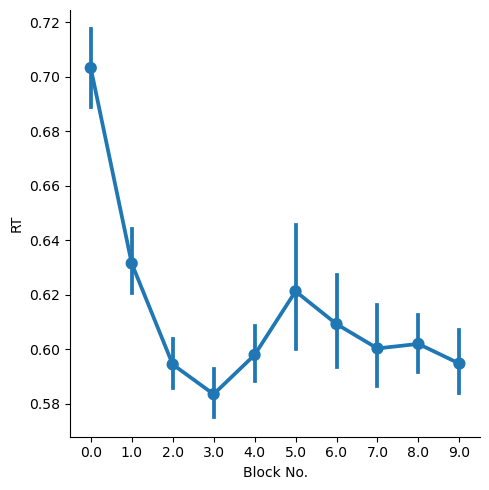

In [11]:
g = sns.catplot(x = 'block.thisN', y = 'size_resp.rt', 
            data = data_size, kind = 'point')
g.set_xlabels('Block No.')
g.set_ylabels('RT')

Stimulus index 3, and index 8 are boundary stimuli.
Stimulus index 1, and index 5 are remote stimuli.

In [8]:
data_size['node type'] = 'community'
data_size.loc[((data_size["index"] == 3) | (data_size["index"] == 8)), 'node type'] = 'boundary'
data_size.loc[((data_size["index"] == 1) | (data_size["index"] == 5)), 'node type'] = 'remote'


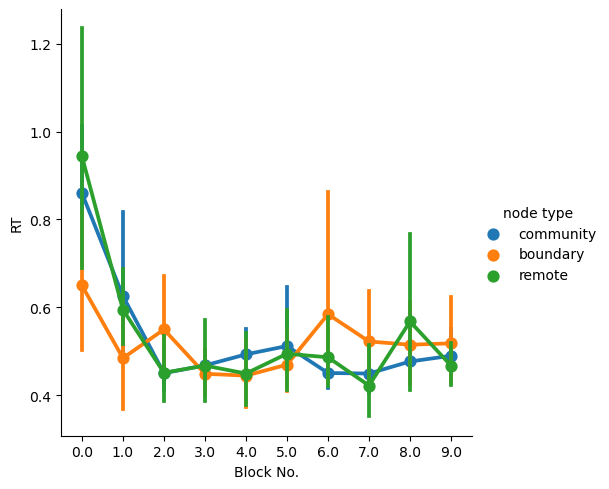

In [9]:
g = sns.catplot(x = 'block.thisN', y = 'size_resp.rt', hue = 'node type',
            data = data_size[data_size['size_resp.corr'] == 0], kind = 'point')
g.set_xlabels('Block No.')
g.set_ylabels('RT')
plt.show()

Transitioning into the new community

In [74]:
data_size['transition type'] = 'within community'
data_size.loc[(data_size['index'] == 3) & (data_size['index'].shift(-1) == 8), 'transition type'] = 'across community'
data_size.loc[(data_size['index'] == 8) & (data_size['index'].shift(-1) == 3), 'transition type'] = 'across community'


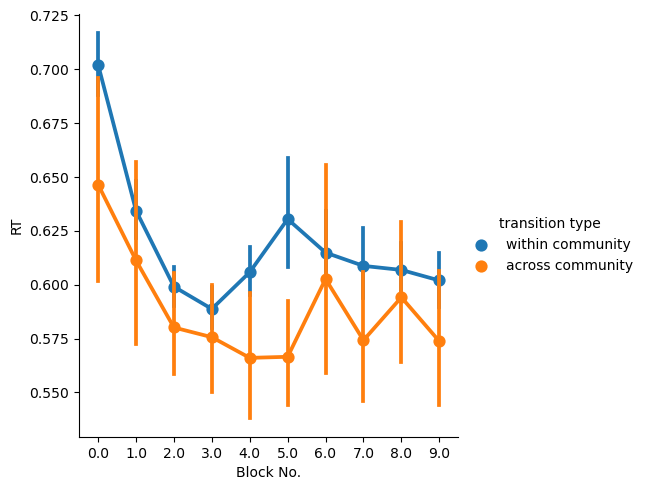

In [77]:
g = sns.catplot(x = 'block.thisN', y = 'size_resp.rt', hue = 'transition type',
            data = data_size[data_size['size_resp.corr'] == 1], kind = 'point')
g.set_xlabels('Block No.')
g.set_ylabels('RT')

# Distance Judgements

In [14]:
data_distance = data.dropna(subset=['dist_2afc_resp.keys']).drop(columns=['level_0']).reset_index()


In [15]:
data_2afc_stim = os.listdir('data/logs/')
df_list = []
for file in data_2afc_stim:
    if file.endswith('csv'):
        df_list.append(pd.read_csv('data/logs/'+file))
data_2afc_stim = pd.concat(df_list).reset_index().drop(columns=['index'])

In [16]:
data_2afc_stim

,stim_00,stim_01,stim_10,stim_11
0,stimuli/3.png,stimuli/8.png,stimuli/2.png,stimuli/3.png
1,stimuli/8.png,stimuli/6.png,stimuli/1.png,stimuli/3.png
2,stimuli/2.png,stimuli/4.png,stimuli/1.png,stimuli/8.png
3,stimuli/1.png,stimuli/2.png,stimuli/1.png,stimuli/9.png
4,stimuli/1.png,stimuli/2.png,stimuli/1.png,stimuli/5.png
...,...,...,...,...
1675,stimuli/1.png,stimuli/6.png,stimuli/1.png,stimuli/5.png
1676,stimuli/1.png,stimuli/5.png,stimuli/1.png,stimuli/2.png
1677,stimuli/1.png,stimuli/5.png,stimuli/4.png,stimuli/8.png
1678,stimuli/1.png,stimuli/5.png,stimuli/2.png,stimuli/9.png


In [17]:
data_distance = data_distance.join(data_2afc_stim)

In [18]:
dist_i = []
dist_j = []
for compare_blocks in range(2):
    for i in range(1, 6):
        for j in range(1, 6):
            if i == j:
                if i == 5:
                    continue
            dist_i.append(i)
            dist_j.append(j)


In [19]:
data_distance['dist_left'] = np.tile(dist_i, 35)
data_distance['dist_right'] = np.tile(dist_j, 35)


In [20]:
data_distance['dist diff'] = np.abs(data_distance['dist_left'] - data_distance['dist_right'])

In [21]:
data_distance['stim_00_community'] = 'community A'
data_distance.loc[data_distance['stim_00'].str.contains('5|6|8|9'), 'stim_00_community'] = 'community B'

data_distance['stim_01_community'] = 'community A'
data_distance.loc[data_distance['stim_01'].str.contains('5|6|8|9'), 'stim_01_community'] = 'community B'

data_distance['stim_10_community'] = 'community A'
data_distance.loc[data_distance['stim_10'].str.contains('5|6|8|9'), 'stim_10_community'] = 'community B'

data_distance['stim_11_community'] = 'community A'
data_distance.loc[data_distance['stim_11'].str.contains('5|6|8|9'), 'stim_11_community'] = 'community B'


In [22]:
data_distance.loc[data_distance['dist_left'] < data_distance['dist_right'], 'correct dist key'] = 'left'
data_distance.loc[data_distance['dist_left'] > data_distance['dist_right'], 'correct dist key'] = 'right'
data_distance.loc[data_distance['dist_left'] == data_distance['dist_right'], 'correct dist key'] = 'either'


In [23]:
data_distance['pair communities'] = 'within within'
data_distance.loc[(data_distance['stim_00_community'] != data_distance['stim_01_community']) & (data_distance['stim_10_community'] == data_distance['stim_11_community']), 'pair communities'] = "between within"
data_distance.loc[(data_distance['stim_00_community'] == data_distance['stim_01_community']) & (data_distance['stim_10_community'] != data_distance['stim_11_community']), 'pair communities'] = "within between"
data_distance.loc[(data_distance['stim_00_community'] != data_distance['stim_01_community']) & (data_distance['stim_10_community'] != data_distance['stim_11_community']), 'pair communities'] = "between between"

In [24]:
data_distance.loc[data_distance['correct dist key'] == data_distance['dist_2afc_resp.keys'], 'correct dist judged'] = 1
data_distance.loc[data_distance['correct dist key'] != data_distance['dist_2afc_resp.keys'], 'correct dist judged'] = 0


In [25]:
data_distance.loc[((data_distance['pair communities'] == 'within between') & (data_distance['dist_2afc_resp.keys'] == 'right')), 'within closer'] = 1
data_distance.loc[((data_distance['pair communities'] == 'within between') & (data_distance['dist_2afc_resp.keys'] == 'left')), 'within closer'] = 0

data_distance.loc[((data_distance['pair communities'] == 'between within') & (data_distance['dist_2afc_resp.keys'] == 'left')), 'within closer'] = 1
data_distance.loc[((data_distance['pair communities'] == 'between within') & (data_distance['dist_2afc_resp.keys'] == 'right')), 'within closer'] = 0

In [26]:
data_distance['pair distances'] = data_distance['dist_left'].astype(str) + data_distance['dist_right'].astype(str)

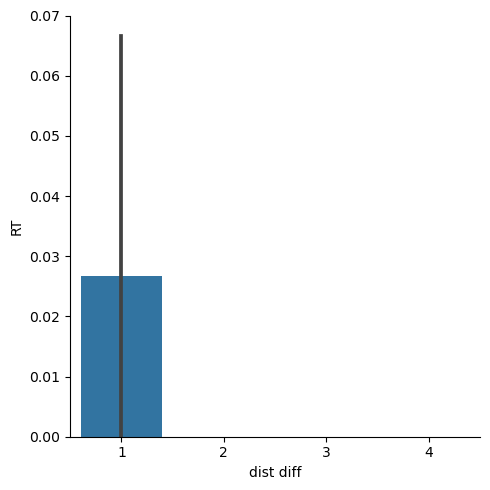

In [35]:
g = sns.catplot(x = 'dist diff', y = 'within closer', 
            data = data_distance.loc[data_distance['correct dist judged'] == 1],
            kind = 'bar'
           )
# g.axes[0][0].axhline(y = 0.5, ls='--', color = 'black')
g.set_ylabels('RT')
plt.show()

In [28]:
data_distance.loc[((data_distance['correct dist key'] == 'either') & (data_distance['pair communities'] == 'within between'))]

,level_0,index,stimulus,correct_answer,block.thisRepN,block.thisTrialN,block.thisN,block.thisIndex,trial.thisRepN,trial.thisTrialN,...,dist diff,stim_00_community,stim_01_community,stim_10_community,stim_11_community,correct dist key,pair communities,correct dist judged,within closer,pair distances
24,2039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community A,community A,community A,community B,either,within between,0.0,1.0,11
168,8231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community A,community A,community A,community B,either,within between,0.0,0.0,11
192,10271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community B,community B,community A,community B,either,within between,0.0,1.0,11
198,10277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community A,community A,community A,community B,either,within between,0.0,1.0,22
414,18557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community B,community B,community A,community B,either,within between,0.0,1.0,22
438,20597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community B,community B,community A,community B,either,within between,0.0,0.0,22
462,20621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community A,community A,community A,community B,either,within between,0.0,1.0,22
510,22685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community A,community A,community A,community B,either,within between,0.0,0.0,22
606,26813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community B,community B,community A,community B,either,within between,0.0,0.0,22
624,28847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,community A,community A,community A,community B,either,within between,0.0,1.0,11
